In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 9.2 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:
pip install  keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import tensorflow as tf
import matplotlib.pyplot as plt
import kerastuner as kt
import tensorflow as tf
import seaborn as sns


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from kerastuner import BayesianOptimization
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from datasets import load_dataset
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report








<ipython-input-6-e26d8226f43a>:7: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [ ]:
print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)
print("NLTK version:", nltk.__version__)
print("TensorFlow version:", tf.__version__)
print("Matplotlib version:", plt.matplotlib.__version__)
print("Keras Tuner version:", kt.__version__)
print("Seaborn version:", sns.__version__)


Pandas version: 2.0.3
NumPy version: 1.25.2
NLTK version: 3.8.1
TensorFlow version: 2.15.0
Matplotlib version: 3.7.1
Keras Tuner version: 1.0.5
Seaborn version: 0.13.1


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
#the emotion dataset is from the hugging face website is directly loaded using the below statement
emotion_dataset = load_dataset("dair-ai/emotion")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1486: FutureWarning: The repository for dair-ai/emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/dair-ai/emotion
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
#the three subcategories of the dataset are extracted
train_emotion_data = emotion_dataset["train"]
test_emotion_data = emotion_dataset["test"]
validation_emotion_data = emotion_dataset["validation"]

In [ ]:

#we create train ,test and validation dataframes
train_emotion_df = pd.DataFrame(train_emotion_data)
test_emotion_df = pd.DataFrame(test_emotion_data)
validation_emotion_df = pd.DataFrame(validation_emotion_data)

In [ ]:
#displaying 10 samples from train dataframe
train_emotion_df.sample(10)

,text,label
2223,i feel drained yet so excited for her and her ...,0
12888,i can not see friends and for the most part i ...,3
5293,i feel hesitant around it,4
14867,i miss feeling like im cute enough to be consi...,1
12597,i love to sew cook and also dabble in mixed me...,0
8306,i continue to explore these sites i feel like ...,1
15657,i would like to pick up on the point made abou...,0
2413,i am feeling particularly disheartened and unm...,0
434,i am happpy when i get good results in the fie...,1
12735,im awake as usual at am and lie there feeling ...,4


In [ ]:
#displaying 10 samples from test dataframe
test_emotion_df.sample(10)

,text,label
675,i feel safe with berry,1
1607,i felt it had a slight bitterness in the finis...,1
913,i feel so glad doing this,1
309,i am feeling pressured to blog the bad,4
877,i feel respected and secure where i can journe...,1
1489,i sometimes feel like a damaged product,0
28,i do feel insecure sometimes but who doesnt,4
153,i feel gloomy and tired,0
1322,i started to feel so overwhelmed,4
1367,i feel pressured to do well and i fe,4


In [ ]:
#displaying 10 samples from validation dataframe
validation_emotion_df.sample(10)

,text,label
255,ive been sitting in my wheel chair to move lau...,1
1970,i feel when i am thrilled with my hair i have ...,1
71,i must say to get to this point where i feel n...,1
409,i feel stupid because i didnt buy in sooner,0
1635,i feel grouchy,3
1538,i have been out there over the last few weeks ...,2
516,i let emotion leak into the decision process a...,3
39,i feel really special and important,1
929,i feel food smarter already and slightly annoy...,3
62,i feel so shamed that i want to give up,0


In [ ]:
#there are 6 unique values in the target label which are pre-encoded,each value indicates an emotion
train_emotion_df['label'].unique()

array([0, 3, 2, 5, 4, 1])

In [ ]:
#we drop the duplicate values if present from all the dataframes
train_emotion_df = train_emotion_df.drop_duplicates()
train_emotion_df = train_emotion_df.dropna()


test_emotion_df = test_emotion_df.drop_duplicates()
test_emotion_df = test_emotion_df.dropna()


validation_emotion_df = validation_emotion_df.drop_duplicates()
validation_emotion_df = validation_emotion_df.dropna()

In [ ]:
#each dataframe is split into X and y where x represents the text and y the labels
X_train = train_emotion_df['text']
y_train = train_emotion_df['label']

X_test = test_emotion_df['text']
y_test = test_emotion_df['label']

X_val = validation_emotion_df['text']
y_val = validation_emotion_df['label']


In [ ]:
#x text cleaning is performed where first we remove special characters from the text then we convert it into lower case
#and then tokens are extracted. then we remove stop words from the tokens and finally we apply WordNetLemmatizer

def remove_special_characters(text):#remove special characters
    return re.sub(r'[^\w\s]', '', text)

def convert_to_lowercase(text):#convert into lower case
    return text.lower()

def tokenize_text(text):#extracting tokens
    return word_tokenize(text)

def remove_stop_words(tokens):#removing stopwords
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word not in stop_words]

def lemmatize_tokens(tokens):#lemmatization
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in tokens]

def clean_text(text):#text cleaning
    text = remove_special_characters(text)
    text = convert_to_lowercase(text)
    tokens = tokenize_text(text)
    tokens = remove_stop_words(tokens)
    tokens = lemmatize_tokens(tokens)
    cleaned_text = ' '.join(tokens)
    return cleaned_text

In [ ]:
#X(text) from train ,test, and validation dataframes are cleaned using the clean text function
X_train_cleaned = X_train.apply(clean_text)

X_test_cleaned = X_test.apply(clean_text)

X_val_cleaned = X_val.apply(clean_text)

In [ ]:
#new dataframes are created for train, test and validation with cleaned text and emotion labels
train_cleaned_df = pd.DataFrame({'text': X_train_cleaned, 'emotions': y_train})

test_cleaned_df = pd.DataFrame({'text': X_test_cleaned, 'emotions': y_test})

val_cleaned_df = pd.DataFrame({'text': X_val_cleaned, 'emotions': y_val})

In [ ]:
#bag of words is created for every emotions with the words that have the most frequency for emotions .a total of
#100 words per emotion is taken at a time and vectorized to form the bag of words
grouped_train_data = train_cleaned_df.groupby('emotions')['text']
bow_per_label = {}
top_words_per_label = 100
for label, group in grouped_train_data:

    texts = group.tolist()
    all_texts = ' '.join(texts)
    tokens = word_tokenize(all_texts)
    word_freq = nltk.FreqDist(tokens)
    top_words = [word for word, _ in word_freq.most_common(top_words_per_label)]

    vectorizer = CountVectorizer(vocabulary=top_words)
    X_bow = vectorizer.fit_transform(texts)

    bow_per_label[label] = X_bow





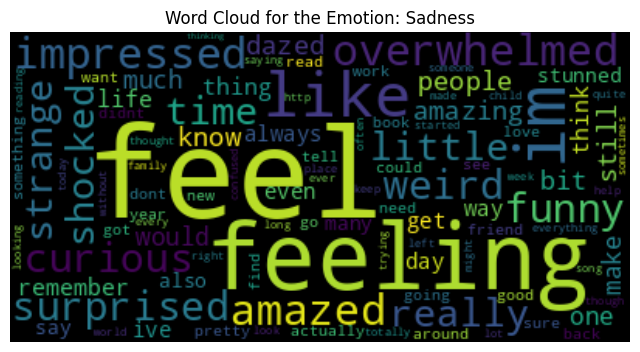

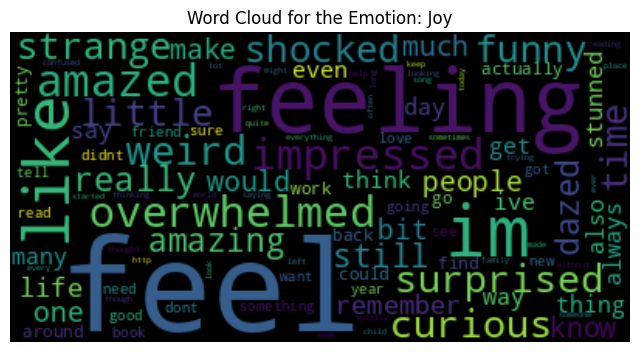

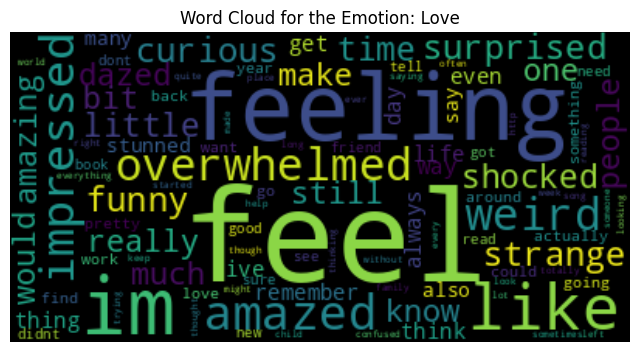

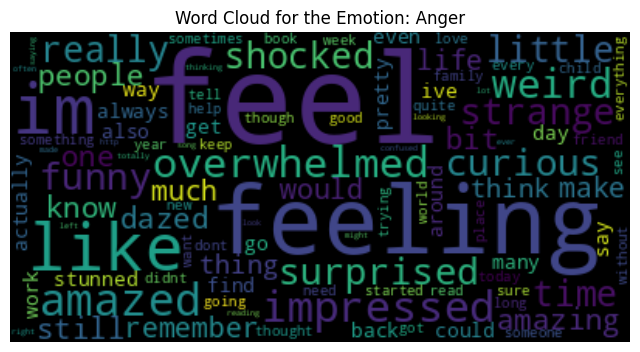

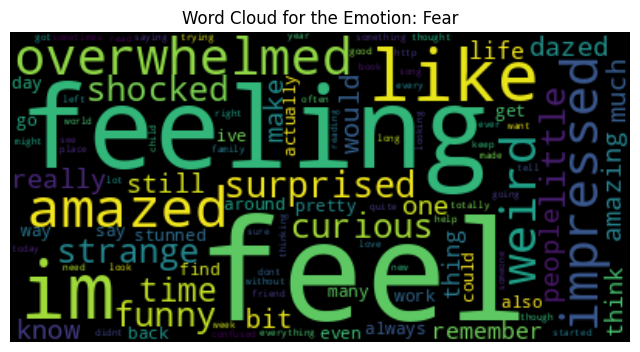

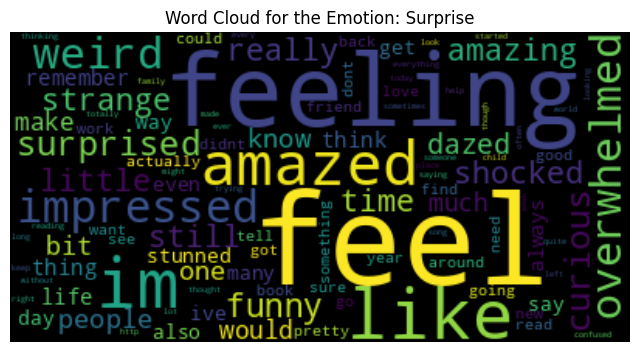

In [ ]:
#using bag of words ,word cloud is created for every emotion
emotion_labels = {0: 'Sadness', 1: 'Joy', 2: 'Love', 3: 'Anger', 4: 'Fear', 5: 'Surprise'}

train_wordcloud = WordCloud()
for label, X_bow in bow_per_label.items():
    vocabulary = vectorizer.get_feature_names_out()
    bow_array = X_bow.toarray()

    word_counts = {word: count for word, count in zip(vocabulary, bow_array.sum(axis=0))}
    train_wordcloud.generate_from_frequencies(word_counts)

    plt.figure(figsize=(8, 6))
    plt.imshow(train_wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for the Emotion: {emotion_labels[label]}')
    plt.axis('off')
    plt.show()


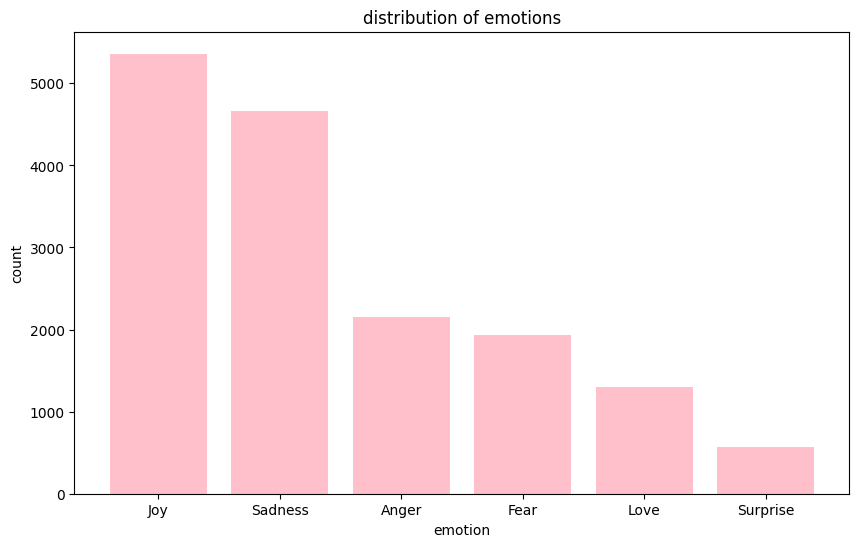

In [ ]:
#plot the frequency of text distribution of every emotion
label_counts = train_cleaned_df['emotions'].value_counts()
emotion_labels = {0: 'Sadness', 1: 'Joy', 2: 'Love', 3: 'Anger', 4: 'Fear', 5: 'Surprise'}
label_emotions = [emotion_labels[label] for label in label_counts.index]

#plotting bar graph
plt.figure(figsize=(10, 6))
plt.bar(label_emotions, label_counts, color='pink')
plt.xlabel('emotion')
plt.ylabel('count')
plt.title('distribution of emotions')
plt.show()


In [ ]:
#calculate average word count and sentence length for each emotion in trainset
emotion_word_counts = train_cleaned_df.groupby('emotions')['text'].apply(lambda x: x.apply(lambda y: len(y.split())).mean())
emotion_sentence_lengths = train_cleaned_df.groupby('emotions')['text'].apply(lambda x: x.apply(lambda y: len(y.split('.'))).mean())
emotions = {0: 'Sadness', 1: 'Joy', 2: 'Love', 3: 'Anger', 4: 'Fear', 5: 'Surprise'}

for label, emotion in emotions.items():
    print(f"emotion: {emotion}")
    print(f"average count of words: {emotion_word_counts[label]}")
    print(f"average length of the sentences: {emotion_sentence_lengths[label]}")
    print()



emotion: Sadness
average count of words: 9.028504072010287
average length of the sentences: 1.0

emotion: Joy
average count of words: 9.518559970154822
average length of the sentences: 1.0

emotion: Love
average count of words: 9.93558282208589
average length of the sentences: 1.0

emotion: Anger
average count of words: 9.32098193608152
average length of the sentences: 1.0

emotion: Fear
average count of words: 9.197728446050593
average length of the sentences: 1.0

emotion: Surprise
average count of words: 9.748251748251748
average length of the sentences: 1.0



In [ ]:
#print 10 samples from the cleaned train set
train_cleaned_df.sample(10)

,text,emotions
11811,want feel dissatisfied want feel happy fulfill...,3
9938,start remember desperately felt trying get pre...,5
1951,im already feeling lethargic,0
3782,feel really irritable im surrounded,3
12419,inferior feel child respected listened allowed...,1
7886,found feeling angry,3
2309,feel socially anxious around lady,4
13065,feel emotional reaction lot time emotion accom...,0
11466,feel funny saying book selling million copy ev...,5
2561,apologize ppl dragged along see feel shamed im...,0


In [ ]:
#printing the shape of train,test and validation set
print(f'the shape of train dataframe is {train_cleaned_df.shape}')
print(f'the shape of test dataframe is {test_cleaned_df.shape}')
print(f'the shape of validation dataframe is {val_cleaned_df.shape}')

the shape of train dataframe is (15999, 2)
the shape of test dataframe is (2000, 2)
the shape of validation dataframe is (2000, 2)


In [ ]:
#saving the train and test set for later use
train_cleaned_df.to_csv('/content/drive/MyDrive/Colab Notebooks/nlp/train.csv', index=False)
test_cleaned_df.to_csv('/content/drive/MyDrive/Colab Notebooks/nlp/test.csv', index=False)

In [ ]:
#X and y indicating text and emotion are extracted from train and validation dataset for training the models
X_train = train_cleaned_df['text']
y_train = train_cleaned_df['emotions']

X_val = val_cleaned_df['text']
y_val = val_cleaned_df['emotions']

In [ ]:
#X_train and x_val are converted into numpy arrays
X_train = np.array(X_train)
X_val = np.array(X_val)

In [ ]:
#printing the shape
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_val shape: ", X_val.shape)
print("y_val shape: ", y_val.shape)

X_train shape:  (15999,)
y_train shape:  (15999,)
X_val shape:  (2000,)
y_val shape:  (2000,)


In [ ]:
#tokenizer with 5000 maximum number of words is fit on the training data to convert the X_train and x_val into a
#sequence of integers representing the words
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_val = tokenizer.texts_to_sequences(X_val)

In [ ]:
#hard coding the maximum sequence length
max_sequence_length = 100

In [ ]:
#adding the sequence to the text data with max_sequence_length to ensure that X_train and x_val have the same length
#as required by cnn
X_train = pad_sequences(X_train, maxlen=max_sequence_length)
X_val = pad_sequences(X_val, maxlen=max_sequence_length)

In [ ]:
#converting y_train and y_val into one hot encoded binary vectors
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [ ]:
#printing the shape
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_val shape: ", X_val.shape)
print("y_val shape: ", y_val.shape)

X_train shape:  (15999, 100)
y_train shape:  (15999, 6)
X_val shape:  (2000, 100)
y_val shape:  (2000, 6)


Baseline Convolutional neural network model

In [ ]:
#Baseline CNN model is defined with 2 1-D convolutional layers followed by 2 max-pooling layers and 2 dense layer
#and one output layer with 6 outputs.dropout and adam optimizer is implemented to avoid overfitting
cnn_model = Sequential()

cnn_model.add(Embedding(input_dim=5000, output_dim=100, input_length=max_sequence_length))
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(256, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(6, activation='softmax'))

cnn_model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = cnn_model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))
cnn_model.summary()


Epoch 1/10
500/500 [==============================] - 30s 49ms/step - loss: 1.4513 - accuracy: 0.3693 - val_loss: 1.2018 - val_accuracy: 0.5305
Epoch 2/10
500/500 [==============================] - 24s 48ms/step - loss: 1.0338 - accuracy: 0.5703 - val_loss: 0.9725 - val_accuracy: 0.6265
Epoch 3/10
500/500 [==============================] - 22s 43ms/step - loss: 0.8195 - accuracy: 0.6726 - val_loss: 0.8922 - val_accuracy: 0.6610
Epoch 4/10
500/500 [==============================] - 24s 48ms/step - loss: 0.6669 - accuracy: 0.7271 - val_loss: 0.9336 - val_accuracy: 0.6700
Epoch 5/10
500/500 [==============================] - 23s 47ms/step - loss: 0.5876 - accuracy: 0.7571 - val_loss: 1.0507 - val_accuracy: 0.6655
Epoch 6/10
500/500 [==============================] - 36s 73ms/step - loss: 0.5275 - accuracy: 0.7819 - val_loss: 1.2313 - val_accuracy: 0.6840
Epoch 7/10
500/500 [==============================] - 35s 70ms/step - loss: 0.4809 - accuracy: 0.8031 - val_loss: 1.1863 - val_accuracy:

In [ ]:
#saving the trained cnn model
cnn_model_path = '/content/drive/MyDrive/Colab Notebooks/nlp/cnn_model.h5'
cnn_model.save(cnn_model_path)
print("cnn Baseline model is saved at:", cnn_model_path)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


cnn Baseline model is saved at: /content/drive/MyDrive/Colab Notebooks/nlp/cnn_model.h5


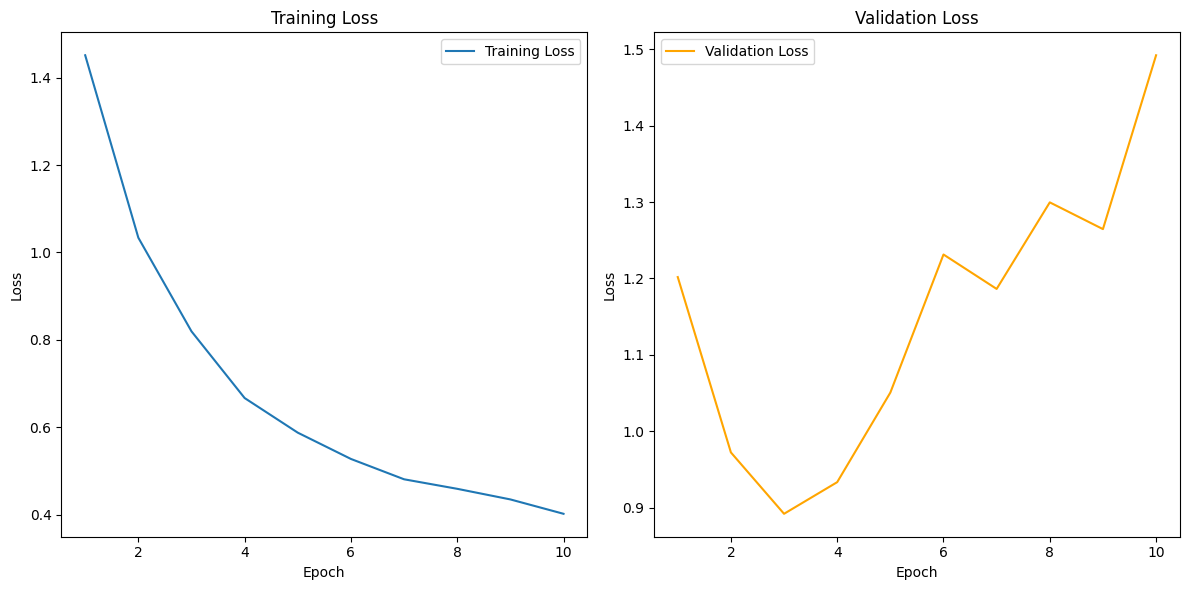

In [ ]:
#we extract the train snd validation loss from history and plot it
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', color='orange')
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


63/63 [==============================] - 1s 12ms/step


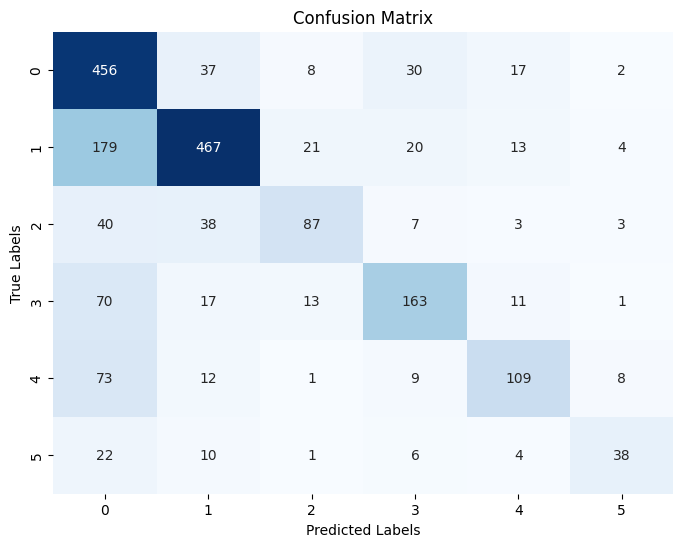

In [ ]:
#plotting confusion matrix
cnn_model_pred = cnn_model.predict(X_val)
cnn_model_pred = np.argmax(cnn_model_pred, axis=1)

true_labels = np.argmax(y_val, axis=1)
conf_matrix = confusion_matrix(true_labels, cnn_model_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()




In [ ]:
#printing the classification matrix
class_labels = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
report = classification_report(true_labels, cnn_model_pred, target_names=class_labels)

precision_table = pd.DataFrame([report.split('\n')[i].split() for i in range(2, 8)], columns=['Class', 'Precision', 'Recall', 'F1-Score', 'Support'])

print("Precision Table:")
print(precision_table)

Precision Table:
      Class Precision Recall F1-Score Support
0   sadness      0.54   0.83     0.66     550
1       joy      0.80   0.66     0.73     704
2      love      0.66   0.49     0.56     178
3     anger      0.69   0.59     0.64     275
4      fear      0.69   0.51     0.59     212
5  surprise      0.68   0.47     0.55      81


Hybrid Convolutional neural network BiDirectional LSTM model

In [ ]:
#hybrid cnn-biLSTM model with an embedding layer,one convolutional layer and one maxpooling layer with 2 biDirectional
#LSTMs and a Dense layer and an output layer,dropout and adam optimizer with 0.001 learning rate is adopted to reduce
#overfitting.the loss is calculated using categorical cross entropy and the model is evaluated over 10epochs

hybrid_model = Sequential()
hybrid_model.add(Embedding(input_dim=5000, output_dim=100, input_length=max_sequence_length))
hybrid_model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
hybrid_model.add(MaxPooling1D(pool_size=2))
#bidirectional LSTM layers
hybrid_model.add(Bidirectional(LSTM(64, dropout=0.5, recurrent_dropout=0.5, return_sequences=True)))
hybrid_model.add(Bidirectional(LSTM(64, dropout=0.5, recurrent_dropout=0.5)))

hybrid_model.add(Dense(256, activation='relu'))
hybrid_model.add(Dropout(0.5))

hybrid_model.add(Dense(6, activation='softmax'))

hybrid_model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
hybrid_history = hybrid_model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))
hybrid_model.summary()


Epoch 1/10
500/500 [==============================] - 223s 414ms/step - loss: 1.0921 - accuracy: 0.5498 - val_loss: 0.4807 - val_accuracy: 0.8430
Epoch 2/10
500/500 [==============================] - 186s 373ms/step - loss: 0.3399 - accuracy: 0.8831 - val_loss: 0.2643 - val_accuracy: 0.9115
Epoch 3/10
500/500 [==============================] - 186s 372ms/step - loss: 0.2049 - accuracy: 0.9299 - val_loss: 0.2974 - val_accuracy: 0.9040
Epoch 4/10
500/500 [==============================] - 187s 374ms/step - loss: 0.1555 - accuracy: 0.9436 - val_loss: 0.2988 - val_accuracy: 0.9055
Epoch 5/10
500/500 [==============================] - 186s 372ms/step - loss: 0.1228 - accuracy: 0.9555 - val_loss: 0.2920 - val_accuracy: 0.9110
Epoch 6/10
500/500 [==============================] - 185s 370ms/step - loss: 0.1019 - accuracy: 0.9637 - val_loss: 0.3237 - val_accuracy: 0.9040
Epoch 7/10
500/500 [==============================] - 184s 368ms/step - loss: 0.0834 - accuracy: 0.9704 - val_loss: 0.3981 -

In [ ]:
#saving the trained cnn hybrid model
cnn_hybrid_model_path = '/content/drive/MyDrive/Colab Notebooks/nlp/hybrid_cnn_model.h5'
hybrid_model.save(cnn_hybrid_model_path)
print("cnn standalone model is saved at:", cnn_hybrid_model_path)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


cnn standalone model is saved at: /content/drive/MyDrive/Colab Notebooks/nlp/hybrid_cnn_model.h5


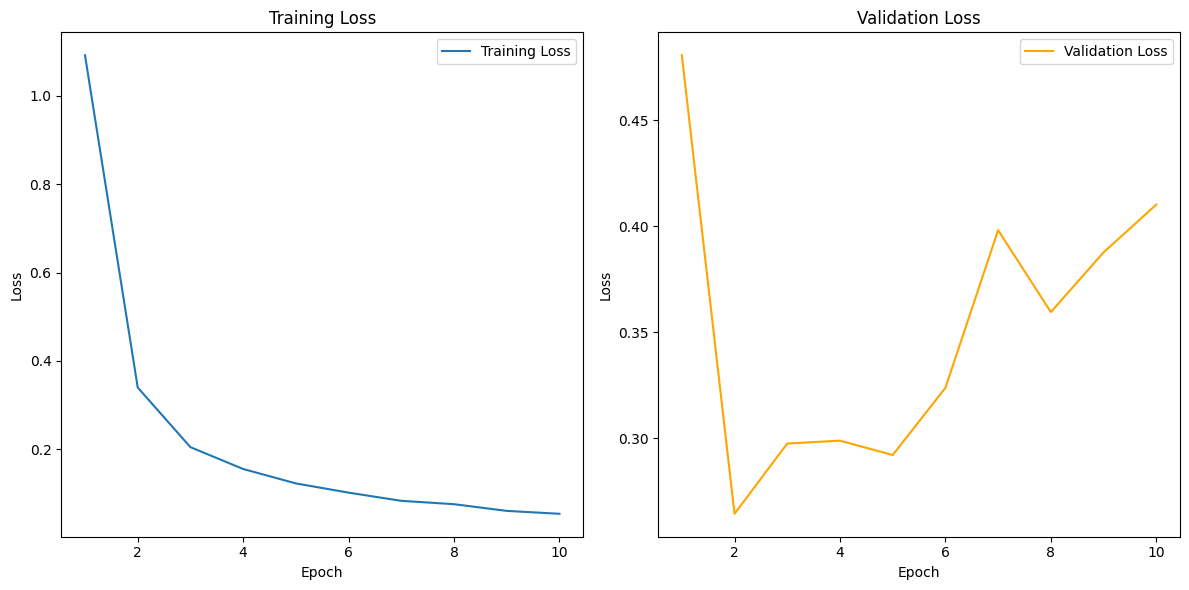

In [ ]:
#we extract the train snd validation loss from history and plot it
train_loss = hybrid_history.history['loss']
val_loss = hybrid_history.history['val_loss']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', color='orange')
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


63/63 [==============================] - 7s 114ms/step


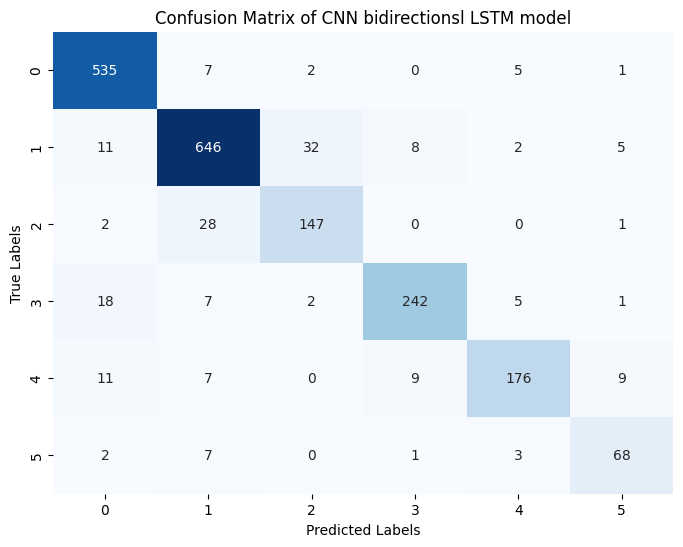

In [ ]:
#plotting confusion matrix
cnn_hybrid_model_pred = hybrid_model.predict(X_val)
cnn_hybrid_model_pred = np.argmax(cnn_hybrid_model_pred, axis=1)

true_labels = np.argmax(y_val, axis=1)
conf_matrix = confusion_matrix(true_labels, cnn_hybrid_model_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of CNN bidirectionsl LSTM model')
plt.show()




In [ ]:
#printing the classification matrix
class_labels = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
report = classification_report(true_labels, cnn_hybrid_model_pred, target_names=class_labels)

precision_table = pd.DataFrame([report.split('\n')[i].split() for i in range(2, 8)], columns=['Class', 'Precision', 'Recall', 'F1-Score', 'Support'])

print("Precision Table:")
print(precision_table)

Precision Table:
      Class Precision Recall F1-Score Support
0   sadness      0.92   0.97     0.95     550
1       joy      0.92   0.92     0.92     704
2      love      0.80   0.83     0.81     178
3     anger      0.93   0.88     0.90     275
4      fear      0.92   0.83     0.87     212
5  surprise      0.80   0.84     0.82      81


Hyperparameter tuning for Hybrid CNN Bidirectional LSTM model

In [ ]:
#Hybrid CNN bidirectionalLSTM model is treated to hyperparameter training using bayesian_optimization and keras tuner is
#adopted to search for best hyper parameters over 10 epochs.the model is then trained on the best hyper parameters
def build_model(hp):
    hyper_model = Sequential()
    hyper_model.add(Embedding(input_dim=5000, output_dim=100, input_length=max_sequence_length))
    hyper_model.add(Conv1D(filters=hp.Int('conv_filters', min_value=32, max_value=128, step=32),
                     kernel_size=hp.Choice('conv_kernel', values=[3, 5]),
                     activation='relu'))
    hyper_model.add(MaxPooling1D(pool_size=2))
    hyper_model.add(Bidirectional(LSTM(units=hp.Int('lstm_units', min_value=32, max_value=128, step=32),
                                 dropout=hp.Float('lstm_dropout', min_value=0.1, max_value=0.5, step=0.1),
                                 recurrent_dropout=hp.Float('lstm_recurrent_dropout', min_value=0.1, max_value=0.5, step=0.1),
                                 return_sequences=True)))
    hyper_model.add(Bidirectional(LSTM(units=hp.Int('lstm_units', min_value=32, max_value=128, step=32),
                                 dropout=hp.Float('lstm_dropout', min_value=0.1, max_value=0.5, step=0.1),
                                 recurrent_dropout=hp.Float('lstm_recurrent_dropout', min_value=0.1, max_value=0.5, step=0.1))))
    hyper_model.add(Dense(units=hp.Int('dense_units', min_value=64, max_value=256, step=64), activation='relu'))
    hyper_model.add(Dropout(rate=hp.Float('dense_dropout', min_value=0.1, max_value=0.5, step=0.1)))
    hyper_model.add(Dense(6, activation='softmax'))
    hyper_model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return hyper_model
tuner = BayesianOptimization(
    build_model,
    objective='val_accuracy',
    max_trials=2,
    directory='bayesian_optimization',
    project_name='emotion_analysis'
)
tuner.search(X_train, y_train,
             epochs=10,
             validation_data=(X_val, y_val))
best_params = tuner.get_best_hyperparameters(num_trials=1)[0]
hyper_model = tuner.hypermodel.build(best_params)
hyper_history = hyper_model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

loss, accuracy = hyper_model.evaluate(X_val, y_val)
print("Validation accuracy:", accuracy)


Trial 2 Complete [01h 01m 19s]
val_accuracy: 0.8399999737739563

Best val_accuracy So Far: 0.8644999861717224
Total elapsed time: 01h 35m 14s
Epoch 1/10
500/500 [==============================] - 226s 415ms/step - loss: 1.6041 - accuracy: 0.3210 - val_loss: 1.5810 - val_accuracy: 0.3520
Epoch 2/10
500/500 [==============================] - 206s 411ms/step - loss: 1.5269 - accuracy: 0.3648 - val_loss: 1.1514 - val_accuracy: 0.5755
Epoch 3/10
500/500 [==============================] - 203s 405ms/step - loss: 0.8781 - accuracy: 0.6584 - val_loss: 0.7172 - val_accuracy: 0.7220
Epoch 4/10
500/500 [==============================] - 204s 408ms/step - loss: 0.5771 - accuracy: 0.7823 - val_loss: 0.5626 - val_accuracy: 0.8155
Epoch 5/10
500/500 [==============================] - 197s 393ms/step - loss: 0.4003 - accuracy: 0.8622 - val_loss: 0.4832 - val_accuracy: 0.8315
Epoch 6/10
500/500 [==============================] - 199s 399ms/step - loss: 0.3188 - accuracy: 0.8907 - val_loss: 0.4736 - val

In [ ]:
#saving the trained cnn hybrid model
cnn_hybrid_tune_model_path = '/content/drive/MyDrive/Colab Notebooks/nlp/hybrid_hyper_cnn_model.h5'
hyper_model.save(cnn_hybrid_tune_model_path)
print("cnn standalone model is saved at:", cnn_hybrid_tune_model_path)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


cnn standalone model is saved at: /content/drive/MyDrive/Colab Notebooks/nlp/hybrid_hyper_cnn_model.h5


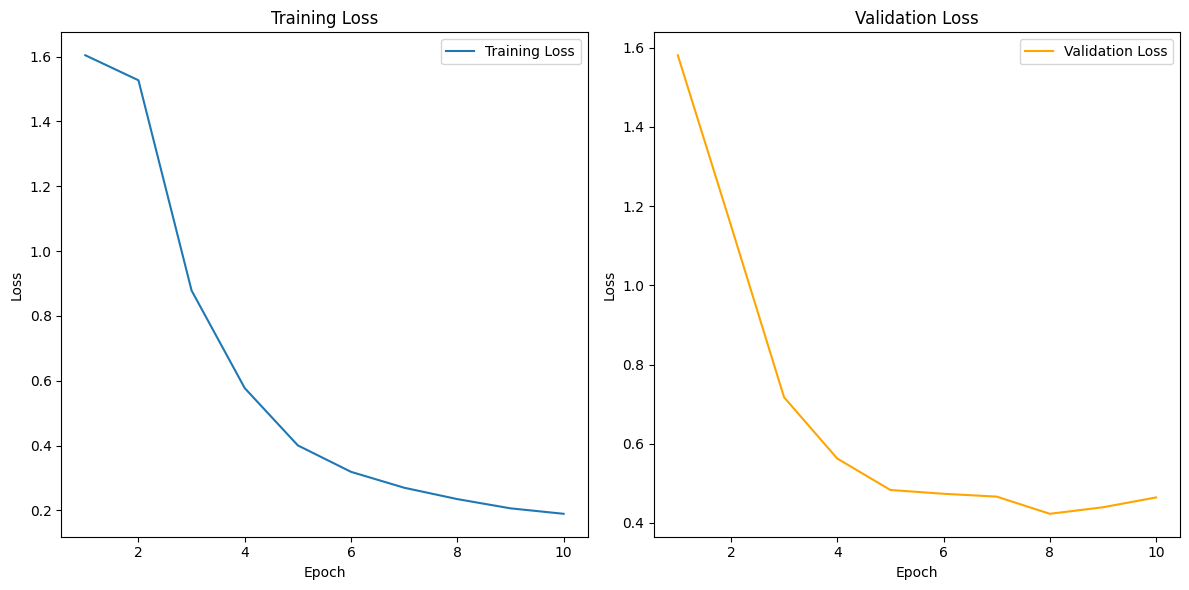

In [ ]:
#we extract the train snd validation loss from history and plot it
train_loss = hyper_history.history['loss']
val_loss = hyper_history.history['val_loss']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', color='orange')
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


63/63 [==============================] - 10s 128ms/step


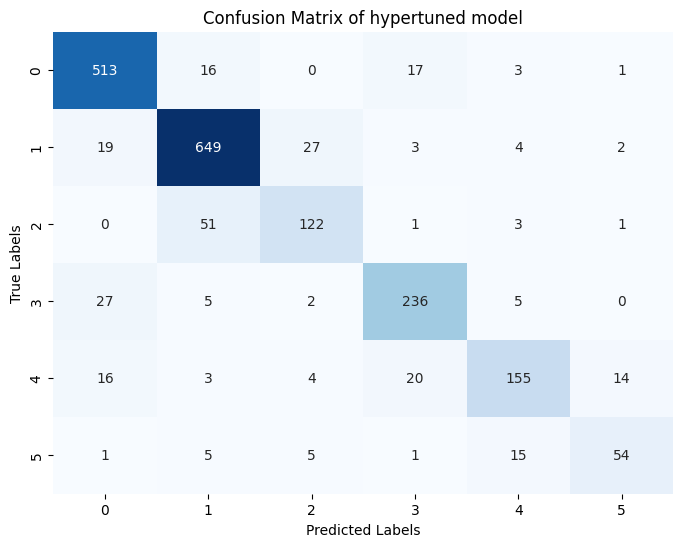

In [ ]:
#plotting confusion matrix
cnn_hyper_model_pred = hyper_model.predict(X_val)
cnn_hyper_model_pred = np.argmax(cnn_hyper_model_pred, axis=1)

true_labels = np.argmax(y_val, axis=1)
conf_matrix = confusion_matrix(true_labels, cnn_hyper_model_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of hypertuned model')
plt.show()




In [ ]:
#printing the classification matrix
class_labels = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
report = classification_report(true_labels, cnn_hyper_model_pred, target_names=class_labels)

precision_table = pd.DataFrame([report.split('\n')[i].split() for i in range(2, 8)], columns=['Class', 'Precision', 'Recall', 'F1-Score', 'Support'])

print("Precision Table:")
print(precision_table)

Precision Table:
      Class Precision Recall F1-Score Support
0   sadness      0.89   0.93     0.91     550
1       joy      0.89   0.92     0.91     704
2      love      0.76   0.69     0.72     178
3     anger      0.85   0.86     0.85     275
4      fear      0.84   0.73     0.78     212
5  surprise      0.75   0.67     0.71      81


@inproceedings{saravia-etal-2018-carer,
    title = "{CARER}: Contextualized Affect Representations for Emotion Recognition",
    author = "Saravia, Elvis  and
      Liu, Hsien-Chi Toby  and
      Huang, Yen-Hao  and
      Wu, Junlin  and
      Chen, Yi-Shin",
    booktitle = "Proceedings of the 2018 Conference on Empirical Methods in Natural Language Processing",
    month = oct # "-" # nov,
    year = "2018",
    address = "Brussels, Belgium",
    publisher = "Association for Computational Linguistics",
    url = "https://www.aclweb.org/anthology/D18-1404",
    doi = "10.18653/v1/D18-1404",
    pages = "3687--3697",
    abstract = "Emotions are expressed in nuanced ways, which varies by collective or individual experiences, knowledge, and beliefs. Therefore, to understand emotion, as conveyed through text, a robust mechanism capable of capturing and modeling different linguistic nuances and phenomena is needed. We propose a semi-supervised, graph-based algorithm to produce rich structural descriptors which serve as the building blocks for constructing contextualized affect representations from text. The pattern-based representations are further enriched with word embeddings and evaluated through several emotion recognition tasks. Our experimental results demonstrate that the proposed method outperforms state-of-the-art techniques on emotion recognition tasks.",
}
